In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def kmeans_clustering(dataset, k, num_iterations=100):
    # Randomly initialize centroids
    np.random.seed(0)
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]
    
    # Loop through iterations
    for _ in range(num_iterations):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((dataset - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([dataset[labels == i].mean(axis=0) for i in range(k)])
        
        # Check convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels

In [3]:
def pca(dataset):
    # Normalize the dataset
    normalized_data = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(normalized_data.T)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top three eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :3]
    
    # Transform the data using the selected eigenvectors
    transformed_data = np.dot(normalized_data, top_eigenvectors)
    
    return transformed_data, sorted_eigenvalues



In [4]:
# Load the Iris dataset
iris_df = pd.read_csv('iris.csv')
species = iris_df['Species']
iris_data = iris_df.drop('Species', axis=1).values


In [5]:

# Perform K-Means Clustering
k = 3  # Number of clusters
labels = kmeans_clustering(iris_data, k)


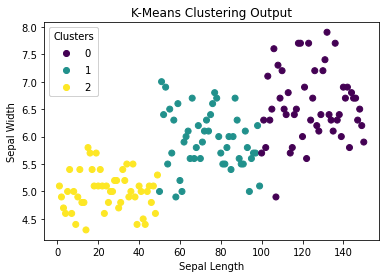

In [6]:

# Plot the output of the cluster
fig, ax = plt.subplots()
scatter = ax.scatter(iris_data[:, 0], iris_data[:, 1], c=labels)
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering Output')
plt.show()

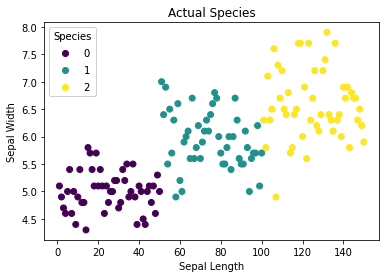

In [7]:

# Plot the actual species
fig, ax = plt.subplots()
scatter = ax.scatter(iris_data[:, 0], iris_data[:, 1], c=species.factorize()[0])
legend = ax.legend(*scatter.legend_elements(), title='Species')
ax.add_artist(legend)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Actual Species')
plt.show()


In [8]:

# Perform Principal Component Analysis (PCA)
transformed_data, eigenvalues = pca(iris_data)


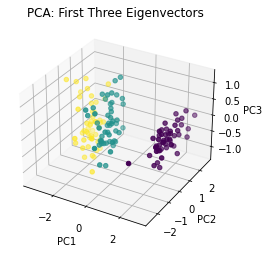

In [9]:

# Plot the data using the first three eigenvectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=species.factorize()[0])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA: First Three Eigenvectors')
plt.show()

In [10]:

# Print the eigenvalues
print('Eigenvalues:', eigenvalues[:3])



Eigenvalues: [3.7603354  0.92794917 0.23570257]
